# Importando librerias

In [48]:
# Importar dataframe y visualizacion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Importar Modelos Regresion Lineal, Logistica, KNN, Random Forest, Árboles decisión, Kmeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

# Importar label 
from sklearn.preprocessing import LabelEncoder

# Importar GridSearch para optimización 
from sklearn.model_selection import GridSearchCV

# Importar Metricas
from sklearn.metrics import classification_report
from sklearn import metrics

# Ignorar errores
import warnings
warnings.filterwarnings('ignore')

# Informacion de la data

In [49]:
filename = "sales_predictions.csv"
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Datos estadisticos del data frame

In [51]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Trabajando datos nulos columna Item_Weight


* Item_Weight (Variable Numerica), para esta columna, sacare un promedio a todos los ID que sean iguales y lo agregare en los NaN existentes en cada ID.  




In [52]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [53]:
df["Item_Identifier"].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [54]:
def Upgrade_Item_Identifier_mean(Item_Identifier):
    Item_Weight_filter  = df['Item_Identifier'] == Item_Identifier
    values_mean = df[Item_Weight_filter]['Item_Weight'].mean()
    return values_mean

In [55]:
Item_Weight_filter_isna = df['Item_Weight'].isna()

In [56]:
df.loc[Item_Weight_filter_isna , 'Item_Weight'] = df.apply(lambda x:Upgrade_Item_Identifier_mean( x['Item_Identifier']) ,axis=1 )
df[Item_Weight_filter_isna]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,8.260,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,8.315,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,15.500,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,14.500,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,5.000,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,17.250,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,19.100,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,12.150,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [57]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Trabajando datos nulos columna Outlet_Size

*  Se remplazo los datos nulos con que todos los Outlet_Identifier iguales tuviesen el mismo Outlet_Size, el resto de datos nulos que queduen en la data se eliminarán junto a los duplicados si es que hay.            


In [58]:
df[["Outlet_Size"]].value_counts()

Outlet_Size
Medium         2793
Small          2388
High            932
dtype: int64

In [59]:
dicc={}

for i in df.index:
    if pd.isnull(df['Outlet_Size'][i]):
        x = df['Outlet_Identifier'][i]
        dicc[x]=''
print(dicc)


{'OUT010': '', 'OUT045': '', 'OUT017': ''}


In [60]:
for sc in dicc:
    for e in range(0, len(df['Outlet_Identifier'])):
        if sc == df['Outlet_Identifier'][e] and pd.notnull(df['Outlet_Size'][e]):
            dicc[sc]=df['Outlet_Size'][e]
print(dicc)


{'OUT010': '', 'OUT045': '', 'OUT017': ''}


In [61]:
for u in df.index:
    if pd.isnull(df['Outlet_Size'][u]):
        for sc in dicc:
            if sc == df['Outlet_Identifier'][u] and dicc[sc]!="":
                df['Outlet_Size'][u] = dicc[sc]


In [62]:
df=df.dropna()

In [63]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Ordenando data por Ventas


In [64]:
df=df.sort_values("Item_Outlet_Sales",ascending=False)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,21.10,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648
5223,FDQ19,7.35,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
1450,FDZ20,16.10,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4349,FDP33,18.70,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
6541,FDI50,8.42,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840


# Gráfico 1, Cantidad y Peso Promedio de productos por año

In [65]:
# conseguir número de producto por año
numberUniqueYear = df.groupby(['Outlet_Establishment_Year'])['Item_Identifier'].nunique()
# esta es una serie de pandas
numberUniqueYear

Outlet_Establishment_Year
1985    1138
1987     932
1997     930
1999     930
2004     930
2009     928
Name: Item_Identifier, dtype: int64

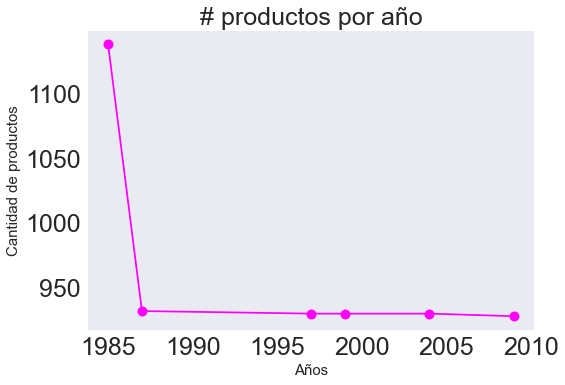

In [66]:
uniqueYears = list(numberUniqueYear.index)
uniqueYears
numproductos = list(numberUniqueYear.values)
numproductos
plt.style.use('seaborn')
plt.plot(uniqueYears, numproductos,c = 'magenta', marker = '.', markersize = 20)
plt.xlabel("Años",fontsize=15)
plt.ylabel("Cantidad de productos",fontsize=15)
plt.xticks(fontsize = 25);
plt.yticks(fontsize = 25);
plt.title("# productos por año",fontsize=25)

plt.grid()
#plt.annotate('Estan fuera de la concentracion de datos', xy=(1996,200), xytext=(1995,700), arrowprops=dict(facecolor='black', shrink=0.05))

In [67]:
ID_W=df.groupby('Outlet_Establishment_Year')['Item_Weight'].mean().sort_values(ascending = False)
ID_W

Outlet_Establishment_Year
1987    13.006148
1985    12.961432
1999    12.917446
2009    12.873346
1997    12.866801
2004    12.829349
Name: Item_Weight, dtype: float64

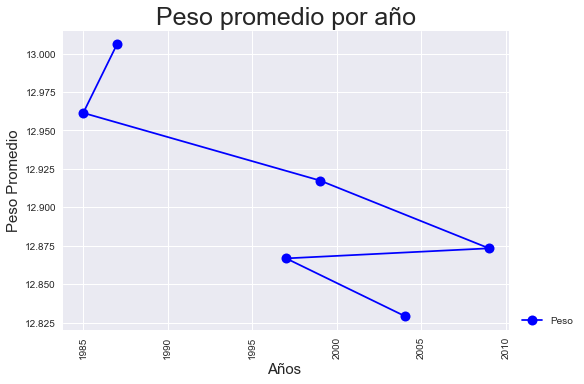

In [68]:
plt.plot(ID_W.index,ID_W.values, label = "Peso",c = 'blue', marker = '.', markersize = 20);
plt.legend(loc=(1.02,0))
plt.xlabel("Años ",fontsize=15);
plt.ylabel("Peso Promedio",fontsize=15);
plt.title("Peso promedio por año",fontsize=25);  
plt.xticks(rotation = 90);

Conclusiones Gráfico 1:
* La cantidad de productos tuvo su pick en sus inicios llegando a tener aproximadamente 1150 productos en el año 1985 y luego tuvo una baja llegando a los años 2000, el resto es parejo. 
* El peso promedio de los productos va variando a lo largo de los año pero no cambia mucho mas alla del rango de [12.6-13]

# Gráfico 2, Cantidad, Peso promedio y Top 10 (%) por tipo 

In [69]:
a=df.groupby(['Item_Type'])['Item_Identifier'].nunique()

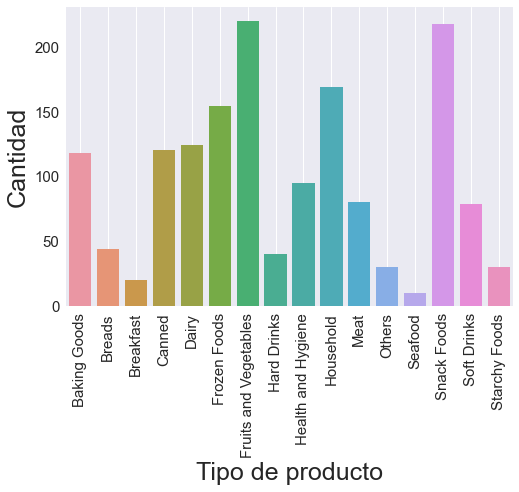

In [70]:
#plt.bar(a.index, a.values);

sns.barplot(a.index, a.values);
plt.grid();
plt.xlabel("Tipo de producto",fontsize = 25)
plt.ylabel("Cantidad",fontsize = 25)
plt.xticks(rotation = 90);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

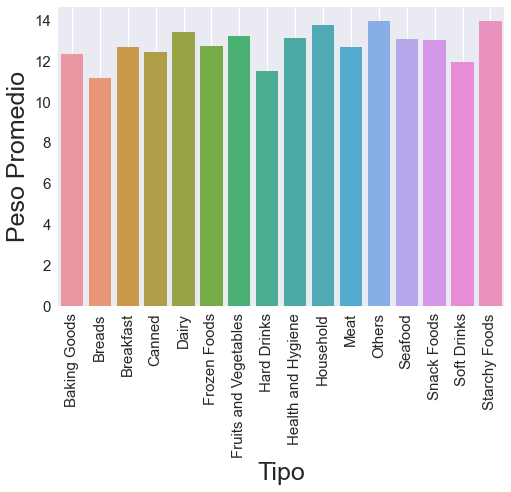

In [71]:
c=df.groupby(['Item_Type'])['Item_Weight'].mean()
sns.barplot(c.index, c.values);
plt.grid();
plt.xlabel("Tipo",fontsize = 25)
plt.ylabel("Peso Promedio",fontsize = 25)
plt.xticks(rotation = 90);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

* Se graficara el top 10 de de los tipo de productos que mas hay (en %)

In [72]:
r=df.groupby("Item_Type").size().sort_values(ascending = False).head(10)
r

Item_Type
Fruits and Vegetables    883
Snack Foods              867
Household                649
Frozen Foods             614
Dairy                    495
Canned                   471
Baking Goods             462
Health and Hygiene       367
Soft Drinks              312
Meat                     309
dtype: int64

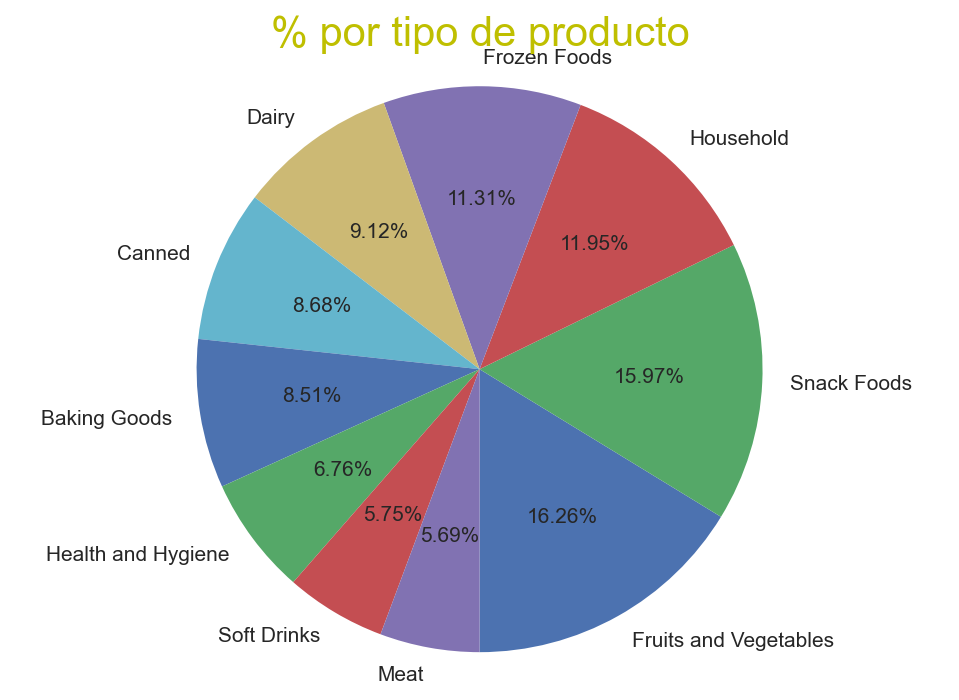

In [73]:
import matplotlib.pyplot as plt

#Gráfico de torta; cortes ordenados y gráficados contra reloj.
size = r.values
etiquetas = r.index
#explotar = [0, 0, 0.1, 0] #sirve para destacar alguna porcion. El valor es cuanto se separa de la torta.

fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(1,1,1) 

ax1.pie(size, labels=etiquetas, autopct="%.2f%%", shadow = False, startangle=-90)
# autopct = porcentaje automático; shadow = grafico con sombra; startangle = ángulo de inicio
# %.2f%% formato de decimal, viene del lenguaje C. Sí, python está escrito en C.

ax1.axis("equal") #asegura proporcion igualitaria, vale decir, suma de porcentajes 100% (círculo)



plt.title("% por tipo de producto",c="y", fontsize=20)
plt.show()

Conclusiones Gráfico 2: 
* Frutas, Vegatales, Snacks y productos de Salud e Higiene (representan un 44% de los productos con un 16.28%,15.86% y 12.03% respectivamente) y se esperaria tambien que los que mas se vendan. 
* En general todo los productos tienen un peso promedio parecido, por lo que este no influiria mucho a la hora de que el producto se venda o no, ni en su almacenaje, etc. 

# Grafico 3: representa en cual supermercado hay una mayor cantidad de productos

In [74]:
typo=df.groupby("Outlet_Type")["Outlet_Type"].count()
typo

Outlet_Type
Grocery Store         527
Supermarket Type1    3722
Supermarket Type2     928
Supermarket Type3     932
Name: Outlet_Type, dtype: int64

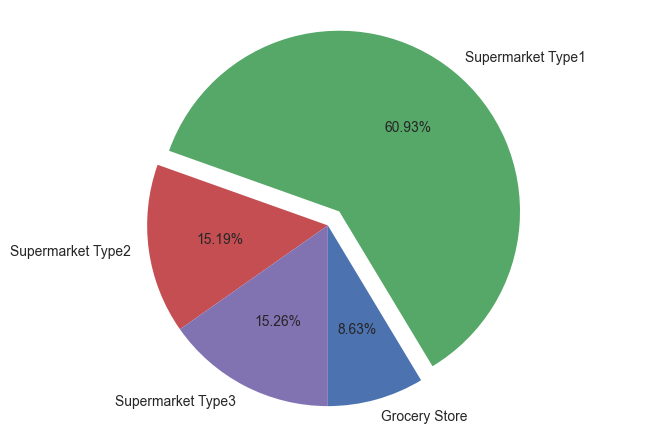

In [75]:
import matplotlib.pyplot as plt

#Gráfico de torta; cortes ordenados y gráficados contra reloj.
size = typo.values
etiquetas = typo.index
explotar = [0, 0.1, 0, 0] #sirve para destacar alguna porcion. El valor es cuanto se separa de la torta.

fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1) 

ax1.pie(size, labels=etiquetas, explode=explotar, autopct="%.2f%%", shadow = False, startangle=-90)
# autopct = porcentaje automático; shadow = grafico con sombra; startangle = ángulo de inicio
# %.2f%% formato de decimal, viene del lenguaje C. Sí, python está escrito en C.

ax1.axis("equal") #asegura proporcion igualitaria, vale decir, suma de porcentajes 100% (círculo)

plt.show()

Conclusión Gráfico 3:
* Se puede ver claramente que los Superketmarket Type1 son aquellos supermercados donde mas productos se tiene y quizas tambien el que mas ventas o ingresos tengan. 


# Grafico 4: Ventas por producto y por año

In [76]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,21.10,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648
5223,FDQ19,7.35,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
1450,FDZ20,16.10,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4349,FDP33,18.70,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
6541,FDI50,8.42,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840


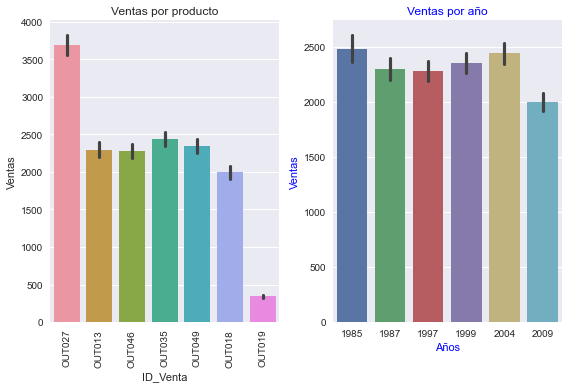

In [77]:
# Subplot 1 
plt.subplot(1, 2, 1);
sns.barplot(df["Outlet_Identifier"], df["Item_Outlet_Sales"]);
plt.xlabel("ID_Venta")
plt.ylabel("Ventas")
plt.title("Ventas por producto")
plt.xticks(rotation = 90);

#plt.scatter(df_intercept['feature'].values, df_intercept['actual'].values, c= 'k');
#plt.title('intercept', fontsize = 12);
# Subplot 2
plt.subplot(1, 2, 2);
import seaborn as sns
sns.barplot(df["Outlet_Establishment_Year"], df["Item_Outlet_Sales"]);
plt.xlabel("Años",c="blue")
plt.ylabel("Ventas",c="blue")
plt.title("Ventas por año",c="blue")

plt.tight_layout()

Conclusiones gráfico 4:
* El producto OUT027 es aquel producto que mas se vende, muy por sobre el resto y por otro lado aquellos productos OUT010 y OUT019 estan muy bajos en venta.
* Se puede ver que en el año 1998 hubo una baja en ventas bastante importa, se desconoce el motivo. 

# Analisis estadistico de los datos, Hisogramas y Cajas
* Se puede ver que los datos estan bastante...
* Del grafico de caja podemos notar que la mediana de aquellos Outlet_Size small es mayor a la de los otros 2, pero por otro lado es aquel que tiene mayor cantidad de datos que puede producir sesgo.


In [78]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,21.10,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648
5223,FDQ19,7.35,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
1450,FDZ20,16.10,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4349,FDP33,18.70,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
6541,FDI50,8.42,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840


In [79]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000
mean,12.913663,0.064477,141.281070,1995.801440,2322.641393
std,4.667931,0.050073,62.241468,8.841193,1741.638109
min,4.555000,0.000000,31.290000,1985.000000,33.955800
25%,8.785000,0.026676,94.046200,1987.000000,974.731200
50%,12.650000,0.052800,143.215400,1997.000000,1928.156800
75%,17.000000,0.092811,185.955600,2004.000000,3266.414800
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


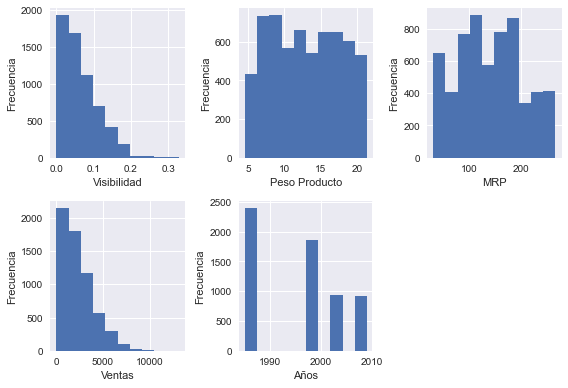

In [80]:
fig = plt.figure()
ax1 = fig.add_subplot(2,3,1)
ax1=df['Item_Visibility'].hist()
plt.xlabel("Visibilidad")
plt.ylabel("Frecuencia")



ax2 = fig.add_subplot(2,3,2)
ax2=df['Item_Weight'].hist()
plt.xlabel("Peso Producto")
plt.ylabel("Frecuencia")


ax3 = fig.add_subplot(2,3,3)
ax3=df['Item_MRP'].hist()
plt.xlabel("MRP")
plt.ylabel("Frecuencia")


ax4 = fig.add_subplot(2,3,4)
ax4=df['Item_Outlet_Sales'].hist()
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")


ax5 = fig.add_subplot(2,3,5)
ax5=df['Outlet_Establishment_Year'].hist()
plt.xlabel("Años")
plt.ylabel("Frecuencia")

fig.tight_layout()

Conlclusión Histogramas:
* Los histogramas de Peso y MRP son histogramas de poca calidad (existen muchas modas, por esto,muchas barras tienen misma frecuencia) , en cambio los de Visibilidad  y Ventas tiene mayor calidad pero no con tanta variacion (Tienen sesgo hacia la derecha)  

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Visibility'>

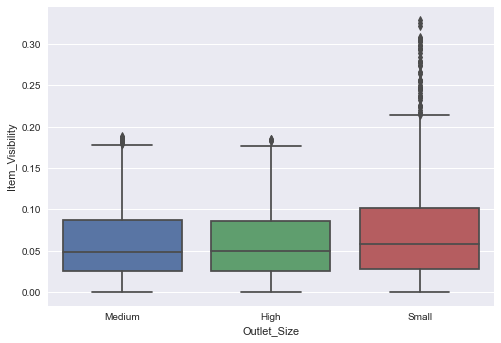

In [81]:
sns.boxplot(x='Outlet_Size', y='Item_Visibility', data=df)

Conclusión Gráfico de cajas 
* Los Size = Medium son aquellos datos que estan menos dispersos los mas dispesos son los Small.
* Todos son asimetricos positivos, sus datos sobre la mediana estan mas sesgados positivamente.

# Correlacion entre variables (Mapa Calor)
* Se puede ver que la mayor correlacion se alcanza entre el MRP del producto y sus Ventas

In [83]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.004705,0.030273,-0.010668,0.010175
Item_Visibility,-0.004705,1.000000,-0.000406,-0.086863,-0.105331
Item_MRP,0.030273,-0.000406,1.000000,0.011164,0.589227
Outlet_Establishment_Year,-0.010668,-0.086863,0.011164,1.000000,-0.057863
Item_Outlet_Sales,0.010175,-0.105331,0.589227,-0.057863,1.000000


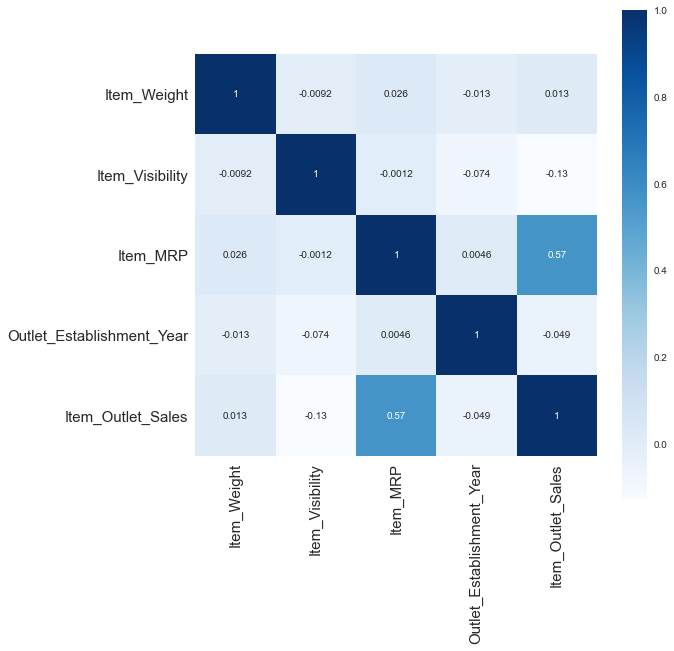

In [41]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True,square=True,cmap="Blues");
#plt.title("Correlacion entre variables",fontsize=25)
plt.tick_params(labelsize=15)

Conclusión Correlación
* Aquellas Variables que mas relación tienen entre ellas son el MRP con Outlet_Sales

# Regresion lineal
* Transformaremos a tipo numerico aquellas variables categoricas mediante una transformación dummie

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [85]:
df2=pd.get_dummies(data=df, columns = ["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type"])
df2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7188,NCE42,21.10,0.010551,234.9958,OUT027,1985,13086.9648,0,1,0,...,0,1,0,0,0,1,0,0,0,1
5223,FDQ19,7.35,0.014296,242.6512,OUT027,1985,12117.5600,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1450,FDZ20,16.10,0.000000,253.0356,OUT027,1985,11445.1020,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4349,FDP33,18.70,0.088840,254.2672,OUT027,1985,10993.6896,0,1,0,...,0,1,0,0,0,1,0,0,0,1
6541,FDI50,8.42,0.030693,228.0352,OUT027,1985,10306.5840,0,0,1,...,0,1,0,0,0,1,0,0,0,1


In [86]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df2.drop(columns = ["Item_Outlet_Sales","Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year"]),
                                        df2['Item_Outlet_Sales'],
                                        random_state = 123)

modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)
predictions = modelo.predict(X_test)
r2=r2_score(y_test,predictions)

In [87]:
r2

0.5403522564511661

# KNN

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [89]:

X_train, X_test, y_train, y_test = train_test_split(
                                        df2.drop(columns = ["Item_Outlet_Sales","Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year"]),
                                        df2['Item_Outlet_Sales'],
                                        random_state = 123)

regressor = KNeighborsRegressor(n_neighbors=2)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
r2=r2_score(y_test,predictions)

In [90]:
r2

0.20603181602998333

# Arbol Decision

In [91]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(
                                        df2.drop(columns = ["Item_Outlet_Sales","Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year"]),
                                        df2['Item_Outlet_Sales'],
                                        random_state = 123)

arbol_reg = DecisionTreeRegressor(random_state = 0)
arbol_reg.fit(X_train, y_train)
predictions = arbol_reg.predict(X_test)
r2=r2_score(y_test,predictions)

In [92]:
r2

0.16800790782172603

# Conclusion de regresiones
* La regresion lineal es aquella que mas me sirve para aplicar un modelo ya que me entrega un r2 mayor que los otros 2 metodos.
* A pesar de lograr un r2 de 0.51, se puede ver que el modelo predicho aun es malo al entregar un r2 bajo.
* RL_r2=0.51  , KNN_r2= 0.23,  TREE_r2 = 0.15